In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [8]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers
from keras.layers import Activation

In [10]:
import tensorflow as tf

### 2 layer network 
#### 784 - 392 - 64 - 10 with all relu and softmax output -- Keras

In [32]:
# input
inputs = Input(shape=(784,))
# hidden layer1
x = Dense(392, activation='relu')(inputs)
#hidden layer 2
x = Dense(64, activation='relu')(x)
#output
out = Dense(10, activation='softmax')(x)
#model
model = Model(inputs=inputs, outputs=out)
print(model.summary())
adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#compile
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
#training
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_29 (Dense)             (None, 64)                25152     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total params: 333,522
Trainable params: 333,522
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.3310 - acc: 0.9113 - val_loss: 0.1552 - val_acc: 0.9559
Epoch 2/20
60000/60000 [==============================] - 4s 69us/step - los

Test score: 0.07724876616429055
Test accuracy: 0.9811


<IPython.core.display.Javascript object>


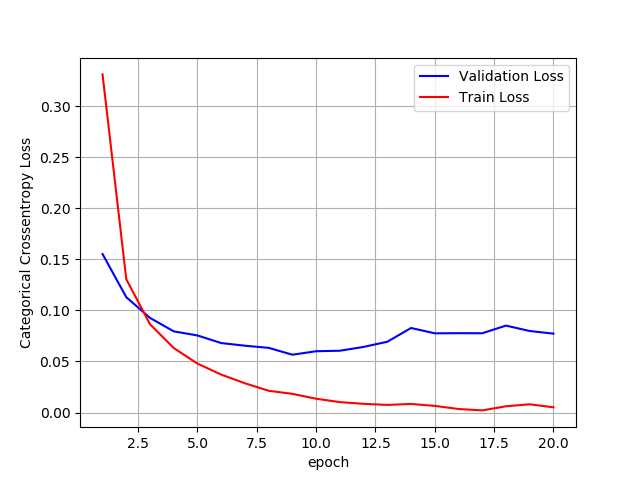

In [33]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### 784 - 392 - 64 - 10 with all relu and softmax output -- tensorflow

In [11]:
### Creating place holders
tf.reset_default_graph()
with tf.name_scope('place_holders'): 
    x = tf.placeholder(tf.float32, [None, 784],name = 'x_input_data')
    y_true = tf.placeholder(tf.float32, [None, 10],name = 'y_labled_true_data')
with tf.name_scope('Weights'):
    weights = {
        'w1': tf.get_variable('w1',shape=[784,392],initializer=tf.contrib.layers.xavier_initializer()),
        'w2': tf.get_variable('w2',shape=[392,64],initializer=tf.contrib.layers.xavier_initializer()),
        'w3': tf.get_variable('w3',shape=[64,10],initializer=tf.contrib.layers.xavier_initializer())
    }
    biases = {
    'b1': tf.get_variable('b1',shape=[392],initializer=tf.zeros_initializer()), 
    'b2': tf.get_variable('b2',shape=[64],initializer=tf.zeros_initializer()),    
    'b3': tf.get_variable('b3',shape=[10],initializer=tf.zeros_initializer())
    }
    
with tf.name_scope('layer1'):
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'],name = 'Dense1')
    layer_1 = tf.nn.relu(layer_1,name='RActivation1')
with tf.name_scope('layer2'):
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'],name = 'Dense2')
    layer_2 = tf.nn.relu(layer_2,name='RActivation2')
with tf.name_scope('output'):
    out = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'],name = 'output')
    out = tf.nn.softmax(out,name='Softmax')
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = out, labels = y_true))
with tf.name_scope('backprop'):
    optimizer_adam = tf.train.AdamOptimizer(learning_rate=0.0005).minimize(cost)
with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(out,1), tf.argmax(y_true,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# create the training datasets
dx_train = tf.data.Dataset.from_tensor_slices(X_train)
dy_train = tf.data.Dataset.from_tensor_slices(Y_train)
# zip the x and y training data together and shuffle, batch etc.
train_dataset = tf.data.Dataset.zip((dx_train, dy_train)).shuffle(500).batch(128)
#iterator
iterator = train_dataset.make_initializable_iterator()
#get next element
next_element = iterator.get_next()
display_step = 1
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    xs, ytrs, ytes = [], [], []
    train_acc = 0.0
    test_acc = 0.0
    for epoch in range(20):
        train_avg_cost = 0.0
        test_avg_cost = 0.0
        total_batch = int(X_train.shape[0]/128)
        sess.run(iterator.initializer)
        for i in range(total_batch):
            batch_xs, batch_ys = sess.run(next_element)
            _, c, w = sess.run([optimizer_adam, cost,weights], feed_dict={x: batch_xs, y_true: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost, feed_dict={x: X_test, y_true: Y_test})
            test_avg_cost += c / total_batch
        train_acc = (sess.run([accuracy],feed_dict={x:X_train, y_true: Y_train}))[0]
        test_acc = (sess.run([accuracy],feed_dict={x:X_test, y_true: Y_test}))[0]
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(train_avg_cost),"acc={:.9f}".format(train_acc),
                                           "test cost={:.9f}".format(test_avg_cost),"test acc={:.9f}".format(test_acc))

Epoch: 0001 cost=1.665115213 acc=0.863699973 test cost=1.657961059 test acc=0.864000022
Epoch: 0002 cost=1.553161122 acc=0.955449998 test cost=1.552255132 test acc=0.952400029
Epoch: 0003 cost=1.506821749 acc=0.968283355 test cost=1.508401569 test acc=0.963100016
Epoch: 0004 cost=1.495825695 acc=0.975149989 test cost=1.500182503 test acc=0.967400014
Epoch: 0005 cost=1.490031286 acc=0.979099989 test cost=1.496287779 test acc=0.970399976
Epoch: 0006 cost=1.485262905 acc=0.980199993 test cost=1.493258562 test acc=0.969500005
Epoch: 0007 cost=1.481818107 acc=0.982616663 test cost=1.491085784 test acc=0.970200002
Epoch: 0008 cost=1.479243853 acc=0.986783326 test cost=1.489379456 test acc=0.974500000
Epoch: 0009 cost=1.477010255 acc=0.986616671 test cost=1.488232427 test acc=0.974799991
Epoch: 0010 cost=1.475809584 acc=0.986800015 test cost=1.487429235 test acc=0.972500026
Epoch: 0011 cost=1.474063572 acc=0.987299979 test cost=1.486677387 test acc=0.971899986
Epoch: 0012 cost=1.473106978 acc

<IPython.core.display.Javascript object>


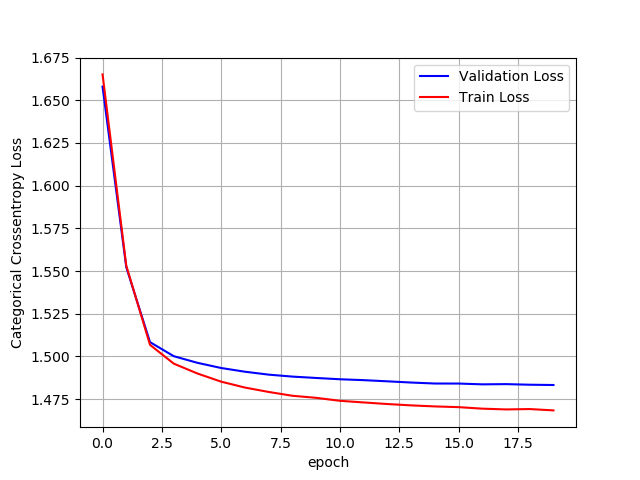

In [13]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(xs, ytes, ytrs, ax)

#### 784 - 392 - 64 - 10 with all relu, Batchnorm on hidden layes and softmax output  - keras

In [36]:
# input
inputs = Input(shape=(784,),name='Input_layer')
# hidden layer 1
x = Dense(392,name='Dlayer1')(inputs)
x = BatchNormalization(name='Blayer1')(x)
x = Activation('relu',name='Alayer1')(x)
#hidden layer2
x = Dense(64,name='Dlayer2')(x)
x = BatchNormalization(name='Blayer2')(x)
x = Activation('relu',name='Alayer2')(x)
#out
out = Dense(10, activation='softmax',name='Output_layer')(x)
#model
model = Model(inputs=inputs, outputs=out)
print(model.summary())
adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#compile
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
#training
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     (None, 784)               0         
_________________________________________________________________
Dlayer1 (Dense)              (None, 392)               307720    
_________________________________________________________________
Blayer1 (BatchNormalization) (None, 392)               1568      
_________________________________________________________________
Alayer1 (Activation)         (None, 392)               0         
_________________________________________________________________
Dlayer2 (Dense)              (None, 64)                25152     
_________________________________________________________________
Blayer2 (BatchNormalization) (None, 64)                256       
_________________________________________________________________
Alayer2 (Activation)         (None, 64)                0         
__________

Test score: 0.08478823226970271
Test accuracy: 0.9789


<IPython.core.display.Javascript object>


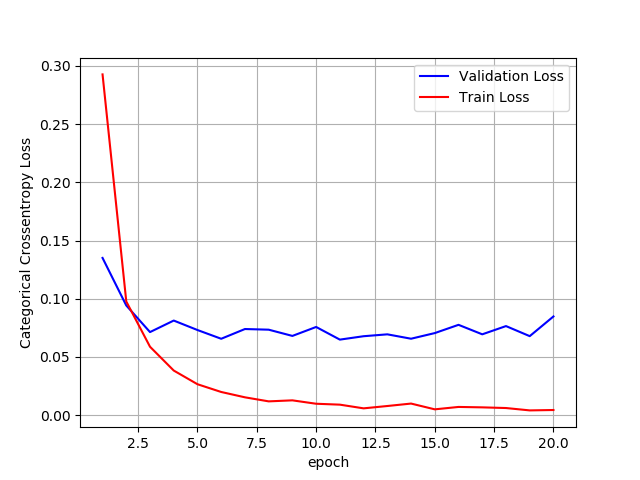

In [37]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### 784 - 392 - 64 - 10 with all relu, Batchnorm on idden layes and softmax output - Tensorflow

Epoch: 0001 cost=1.591900543 acc=0.966816664 test cost=1.582991538 test acc=0.961899996
Epoch: 0002 cost=1.504018855 acc=0.980383337 test cost=1.502923975 test acc=0.972000003
Epoch: 0003 cost=1.489843388 acc=0.985450029 test cost=1.493284358 test acc=0.974500000
Epoch: 0004 cost=1.482457173 acc=0.988499999 test cost=1.489334382 test acc=0.977400005
Epoch: 0005 cost=1.478255027 acc=0.990999997 test cost=1.486667594 test acc=0.978100002
Epoch: 0006 cost=1.474952367 acc=0.991216660 test cost=1.485367718 test acc=0.977199972
Epoch: 0007 cost=1.472775489 acc=0.993533313 test cost=1.484200543 test acc=0.979300022
Epoch: 0008 cost=1.471633176 acc=0.994183362 test cost=1.483711184 test acc=0.981000006
Epoch: 0009 cost=1.470122601 acc=0.994816661 test cost=1.482396444 test acc=0.980799973
Epoch: 0010 cost=1.469446362 acc=0.994700015 test cost=1.482001757 test acc=0.981000006
Epoch: 0011 cost=1.468605584 acc=0.995999992 test cost=1.481875223 test acc=0.980400026
Epoch: 0012 cost=1.467851525 acc

<IPython.core.display.Javascript object>


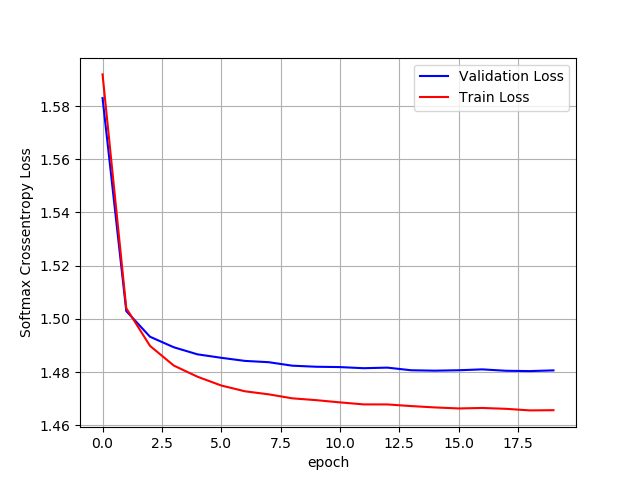

In [15]:
### Creating place holders
tf.reset_default_graph()
epsilon = 1e-3
with tf.name_scope('place_holders'): 
    x = tf.placeholder(tf.float32, [None, 784],name = 'x_input_data')
    y_true = tf.placeholder(tf.float32, [None, 10],name = 'y_labled_true_data')
with tf.name_scope('Weights'):
    weights = {
        'w1': tf.get_variable('w1',shape=[784,392],initializer=tf.contrib.layers.xavier_initializer()),
        'w2': tf.get_variable('w2',shape=[392,64],initializer=tf.contrib.layers.xavier_initializer()),
        'w3': tf.get_variable('w3',shape=[64,10],initializer=tf.contrib.layers.xavier_initializer())
    }
    biases = {
    'b1': tf.get_variable('b1',shape=[392],initializer=tf.zeros_initializer()), 
    'b2': tf.get_variable('b2',shape=[64],initializer=tf.zeros_initializer()),    
    'b3': tf.get_variable('b3',shape=[10],initializer=tf.zeros_initializer())
    }
    
with tf.name_scope('layer1'):
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'],name = 'Dense1')
    batch_mean_1, batch_var_1 = tf.nn.moments(layer_1,[0])
    scale_1 = tf.Variable(tf.ones([392]))
    beta_1 = tf.Variable(tf.zeros([392]))
    layer_1 = tf.nn.batch_normalization(layer_1, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon,name='BNorm1')
    layer_1 = tf.nn.relu(layer_1,name='RActivation1')
with tf.name_scope('layer2'):
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'],name = 'Dense2')
    batch_mean_2, batch_var_2 = tf.nn.moments(layer_2,[0])
    scale_2 = tf.Variable(tf.ones([64]))
    beta_2 = tf.Variable(tf.zeros([64]))
    layer_2 = tf.nn.batch_normalization(layer_2, batch_mean_2, batch_var_2, beta_2, scale_2, epsilon,name='BNorm2')
    layer_2 = tf.nn.relu(layer_2,name='RActivation2')
with tf.name_scope('output'):
    out = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'],name = 'output')
    out = tf.nn.softmax(out,name='Softmax')
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = out, labels = y_true))
with tf.name_scope('backprop'):
    optimizer_adam = tf.train.AdamOptimizer(learning_rate=0.0005).minimize(cost)
with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(out,1), tf.argmax(y_true,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# create the training datasets
dx_train = tf.data.Dataset.from_tensor_slices(X_train)
dy_train = tf.data.Dataset.from_tensor_slices(Y_train)
# zip the x and y training data together and shuffle, batch etc.
train_dataset = tf.data.Dataset.zip((dx_train, dy_train)).shuffle(500).batch(128)
#iterator
iterator = train_dataset.make_initializable_iterator()
#get next element
next_element = iterator.get_next()
display_step = 1
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    xs, ytrs, ytes = [], [], []
    train_acc = 0.0
    test_acc = 0.0
    for epoch in range(20):
        train_avg_cost = 0.0
        test_avg_cost = 0.0
        total_batch = int(X_train.shape[0]/128)
        sess.run(iterator.initializer)
        for i in range(total_batch):
            batch_xs, batch_ys = sess.run(next_element)
            _, c, w = sess.run([optimizer_adam, cost,weights], feed_dict={x: batch_xs, y_true: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost, feed_dict={x: X_test, y_true: Y_test})
            test_avg_cost += c / total_batch
        train_acc = (sess.run([accuracy],feed_dict={x:X_train, y_true: Y_train}))[0]
        test_acc = (sess.run([accuracy],feed_dict={x:X_test, y_true: Y_test}))[0]
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(train_avg_cost),"acc={:.9f}".format(train_acc),
                                           "test cost={:.9f}".format(test_avg_cost),"test acc={:.9f}".format(test_acc))
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Softmax Crossentropy Loss')
plt_dynamic(xs, ytes, ytrs, ax)

####  784 - 392 - 64 - 10 with all relu ,Batchnorm and dropout on hidden layes and softmax output - Keras

In [40]:
# input
inputs = Input(shape=(784,),name='Input_layer')
# hidden layer 1
x = Dense(392,name='Dlayer1')(inputs)
x = BatchNormalization(name='Blayer1')(x)
x = Activation('relu',name='Alayer1')(x)
x = Dropout(rate=0.4,name='Drlayer1')(x)
#hidden layer2
x = Dense(64,name='Dlayer2')(x)
x = BatchNormalization(name='Blayer2')(x)
x = Activation('relu',name='Alayer2')(x)
x = Dropout(rate=0.4,name='Drlayer2')(x)
#out
out = Dense(10, activation='softmax',name='Output_layer')(x)
#model
model = Model(inputs=inputs, outputs=out)
print(model.summary())
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#compile
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
#training
history = model.fit(X_train, Y_train, batch_size=128, epochs=32, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     (None, 784)               0         
_________________________________________________________________
Dlayer1 (Dense)              (None, 392)               307720    
_________________________________________________________________
Blayer1 (BatchNormalization) (None, 392)               1568      
_________________________________________________________________
Alayer1 (Activation)         (None, 392)               0         
_________________________________________________________________
Drlayer1 (Dropout)           (None, 392)               0         
_________________________________________________________________
Dlayer2 (Dense)              (None, 64)                25152     
_________________________________________________________________
Blayer2 (BatchNormalization) (None, 64)                256       
__________

Test score: 0.0590697706670966
Test accuracy: 0.9843


<IPython.core.display.Javascript object>


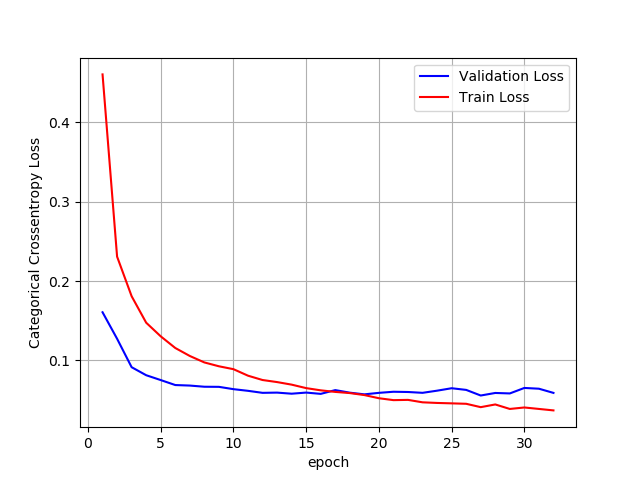

In [41]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,33))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

####  784 - 392 - 64 - 10 with all relu ,Batchnorm and dropout on hidden layes and softmax output - Tensorflow

Epoch: 0001 cost=1.731791468 acc=0.876433313 test cost=1.720432235 test acc=0.881900012
Epoch: 0002 cost=1.594874881 acc=0.899550021 test cost=1.587469975 test acc=0.900200009
Epoch: 0003 cost=1.570556228 acc=0.915566683 test cost=1.563623525 test acc=0.914300025
Epoch: 0004 cost=1.557318421 acc=0.922883332 test cost=1.551386922 test acc=0.922900021
Epoch: 0005 cost=1.546317148 acc=0.929516673 test cost=1.543476427 test acc=0.929600000
Epoch: 0006 cost=1.540039581 acc=0.933866680 test cost=1.537321969 test acc=0.932600021
Epoch: 0007 cost=1.535750647 acc=0.938883305 test cost=1.532651953 test acc=0.937200010
Epoch: 0008 cost=1.530833601 acc=0.939883351 test cost=1.529633949 test acc=0.936399996
Epoch: 0009 cost=1.528817173 acc=0.943633318 test cost=1.526847145 test acc=0.939300001
Epoch: 0010 cost=1.526183478 acc=0.946116686 test cost=1.523876807 test acc=0.941100001
Epoch: 0011 cost=1.522906059 acc=0.948650002 test cost=1.522001660 test acc=0.940500021
Epoch: 0012 cost=1.521075729 acc

<IPython.core.display.Javascript object>


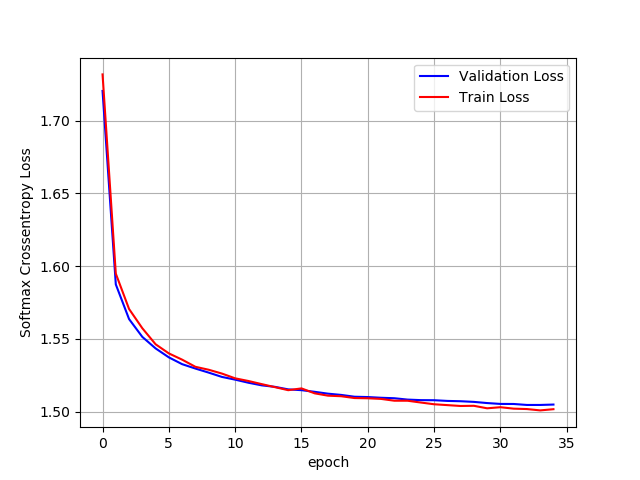

In [19]:
### Creating place holders
tf.reset_default_graph()
epsilon = 1e-3

with tf.name_scope('place_holders'): 
    x = tf.placeholder(tf.float32, [None, 784],name = 'x_input_data')
    y_true = tf.placeholder(tf.float32, [None, 10],name = 'y_labled_true_data')
with tf.name_scope('Weights'):
    weights = {
        'w1': tf.get_variable('w1',shape=[784,392],initializer=tf.contrib.layers.xavier_initializer()),
        'w2': tf.get_variable('w2',shape=[392,64],initializer=tf.contrib.layers.xavier_initializer()),
        'w3': tf.get_variable('w3',shape=[64,10],initializer=tf.contrib.layers.xavier_initializer())
    }
    biases = {
    'b1': tf.get_variable('b1',shape=[392],initializer=tf.zeros_initializer()), 
    'b2': tf.get_variable('b2',shape=[64],initializer=tf.zeros_initializer()),    
    'b3': tf.get_variable('b3',shape=[10],initializer=tf.zeros_initializer())
    }
    
with tf.name_scope('layer1'):
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'],name = 'Dense1')
    batch_mean_1, batch_var_1 = tf.nn.moments(layer_1,[0])
    scale_1 = tf.Variable(tf.ones([392]))
    beta_1 = tf.Variable(tf.zeros([392]))
    layer_1 = tf.nn.batch_normalization(layer_1, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon,name='BNorm1')
    layer_1 = tf.nn.relu(layer_1,name='RActivation1')
    layer_1 = tf.nn.dropout(layer_1,0.4,name='Dropout1')
    tf.summary.histogram('activations', layer_1)
with tf.name_scope('layer2'):
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'],name = 'Dense2')
    batch_mean_2, batch_var_2 = tf.nn.moments(layer_2,[0])
    scale_2 = tf.Variable(tf.ones([64]))
    beta_2 = tf.Variable(tf.zeros([64]))
    layer_2 = tf.nn.batch_normalization(layer_2, batch_mean_2, batch_var_2, beta_2, scale_2, epsilon,name='BNorm2')
    layer_2 = tf.nn.relu(layer_2,name='RActivation2')
    layer_2 = tf.nn.dropout(layer_2,0.4,name='Dropout2')
    tf.summary.histogram('activations', layer_2)
with tf.name_scope('output'):
    out = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'],name = 'output')
    out = tf.nn.softmax(out,name='Softmax')
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = out, labels = y_true))
tf.summary.scalar('Cost', cost)
with tf.name_scope('backprop'):
    optimizer_adam = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(out,1), tf.argmax(y_true,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar('Accuracy', accuracy)

# create the training datasets
dx_train = tf.data.Dataset.from_tensor_slices(X_train)
dy_train = tf.data.Dataset.from_tensor_slices(Y_train)
# zip the x and y training data together and shuffle, batch etc.
train_dataset = tf.data.Dataset.zip((dx_train, dy_train)).shuffle(500).batch(128)
#iterator
iterator = train_dataset.make_initializable_iterator()
#get next element
next_element = iterator.get_next()

merged = tf.summary.merge_all()

display_step = 1
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    #writing
    train_writer = tf.summary.FileWriter('graph_2layer3_train',sess.graph)
    test_writer = tf.summary.FileWriter('graph_2layer3_test')
    xs, ytrs, ytes = [], [], []
    train_acc = 0.0
    test_acc = 0.0
    for epoch in range(35):
        train_avg_cost = 0.0
        test_avg_cost = 0.0
        total_batch = int(X_train.shape[0]/128)
        sess.run(iterator.initializer)
        for i in range(total_batch):
            batch_xs, batch_ys = sess.run(next_element)
            _, c, w = sess.run([optimizer_adam, cost,weights], feed_dict={x: batch_xs, y_true: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost, feed_dict={x: X_test, y_true: Y_test})
            test_avg_cost += c / total_batch
        train_acc,summ = (sess.run([accuracy,merged],feed_dict={x:X_train, y_true: Y_train}))
        train_writer.add_summary(summ, epoch)
        test_acc,summ = (sess.run([accuracy,merged],feed_dict={x:X_test, y_true: Y_test}))
        test_writer.add_summary(summ, epoch)
        
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(train_avg_cost),"acc={:.9f}".format(train_acc),
                                           "test cost={:.9f}".format(test_avg_cost),"test acc={:.9f}".format(test_acc))
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Softmax Crossentropy Loss')
plt_dynamic(xs, ytes, ytrs, ax)

### 3 layer network 
#### 784 - 512 - 256 - 128 - 10 with all relu on hidden layes and softmax output

In [42]:
# input
inputs = Input(shape=(784,),name='Input_layer')
# hidden layer 1
x = Dense(512,name='Dlayer1')(inputs)
x = Activation('relu',name='Alayer1')(x)
#hidden layer2
x = Dense(256,name='Dlayer2')(x)
x = Activation('relu',name='Alayer2')(x)
#hidden layer3
x = Dense(128,name='Dlayer3')(x)
x = Activation('relu',name='Alayer3')(x)
#out
out = Dense(10, activation='softmax',name='Output_layer')(x)
#model
model = Model(inputs=inputs, outputs=out)
print(model.summary())
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#compile
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
#training
history = model.fit(X_train, Y_train, batch_size=128, epochs=25, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     (None, 784)               0         
_________________________________________________________________
Dlayer1 (Dense)              (None, 512)               401920    
_________________________________________________________________
Alayer1 (Activation)         (None, 512)               0         
_________________________________________________________________
Dlayer2 (Dense)              (None, 256)               131328    
_________________________________________________________________
Alayer2 (Activation)         (None, 256)               0         
_________________________________________________________________
Dlayer3 (Dense)              (None, 128)               32896     
_________________________________________________________________
Alayer3 (Activation)         (None, 128)               0         
__________

Test score: 0.09119474123555606
Test accuracy: 0.9814


<IPython.core.display.Javascript object>


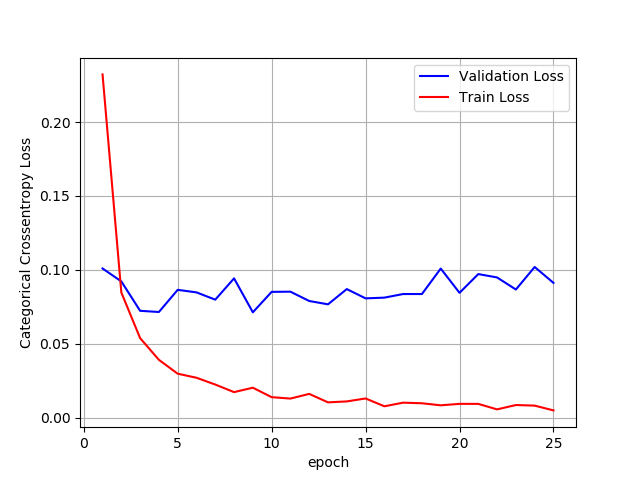

In [43]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,26))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### 784 - 512 - 256 - 128 - 10 with all relu,batchnorm on hidden layes and softmax output

In [44]:
# input
inputs = Input(shape=(784,),name='Input_layer')
# hidden layer 1
x = Dense(512,name='Dlayer1')(inputs)
x = BatchNormalization(name='Blayer1')(x)
x = Activation('relu',name='Alayer1')(x)
#hidden layer2
x = Dense(256,name='Dlayer2')(x)
x = BatchNormalization(name='Blayer2')(x)
x = Activation('relu',name='Alayer2')(x)
#hidden layer2
x = Dense(128,name='Dlayer3')(x)
x = BatchNormalization(name='Blayer3')(x)
x = Activation('relu',name='Alayer3')(x)
#out
out = Dense(10, activation='softmax',name='Output_layer')(x)
#model
model = Model(inputs=inputs, outputs=out)
print(model.summary())
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#compile
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
#training
history = model.fit(X_train, Y_train, batch_size=128, epochs=25, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     (None, 784)               0         
_________________________________________________________________
Dlayer1 (Dense)              (None, 512)               401920    
_________________________________________________________________
Blayer1 (BatchNormalization) (None, 512)               2048      
_________________________________________________________________
Alayer1 (Activation)         (None, 512)               0         
_________________________________________________________________
Dlayer2 (Dense)              (None, 256)               131328    
_________________________________________________________________
Blayer2 (BatchNormalization) (None, 256)               1024      
_________________________________________________________________
Alayer2 (Activation)         (None, 256)               0         
__________

Test score: 0.07790960603984477
Test accuracy: 0.9802


<IPython.core.display.Javascript object>


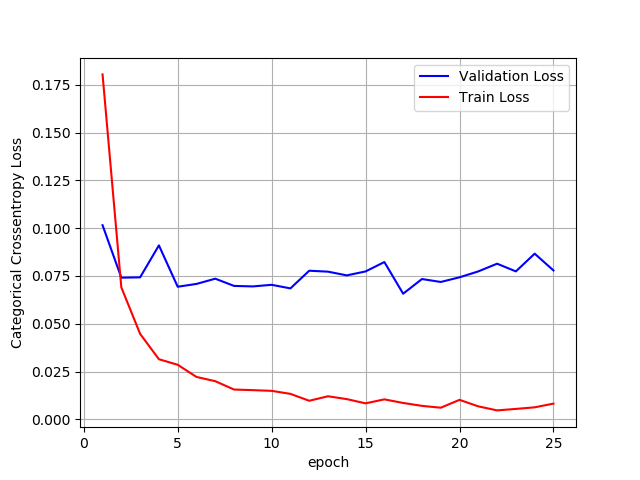

In [45]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,26))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### 784 - 512 - 256 - 128 - 10 with all relu,batchnorm and dropout on hidden layes and softmax output

In [46]:
# input
inputs = Input(shape=(784,),name='Input_layer')
# hidden layer 1
x = Dense(512,name='Dlayer1')(inputs)
x = BatchNormalization(name='Blayer1')(x)
x = Activation('relu',name='Alayer1')(x)
x = Dropout(rate=0.5,name='Drlayer1')(x)
#hidden layer2
x = Dense(256,name='Dlayer2')(x)
x = BatchNormalization(name='Blayer2')(x)
x = Activation('relu',name='Alayer2')(x)
x = Dropout(rate=0.5,name='Drlayer2')(x)
#hidden layer3
x = Dense(64,name='Dlayer3')(x)
x = BatchNormalization(name='Blayer3')(x)
x = Activation('relu',name='Alayer3')(x)
x = Dropout(rate=0.5,name='Drlayer3')(x)
#out
out = Dense(10, activation='softmax',name='Output_layer')(x)
#model
model = Model(inputs=inputs, outputs=out)
print(model.summary())
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#compile
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
#training
history = model.fit(X_train, Y_train, batch_size=128, epochs=32, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     (None, 784)               0         
_________________________________________________________________
Dlayer1 (Dense)              (None, 512)               401920    
_________________________________________________________________
Blayer1 (BatchNormalization) (None, 512)               2048      
_________________________________________________________________
Alayer1 (Activation)         (None, 512)               0         
_________________________________________________________________
Drlayer1 (Dropout)           (None, 512)               0         
_________________________________________________________________
Dlayer2 (Dense)              (None, 256)               131328    
_________________________________________________________________
Blayer2 (BatchNormalization) (None, 256)               1024      
__________

Test score: 0.06090575837812812
Test accuracy: 0.984


<IPython.core.display.Javascript object>


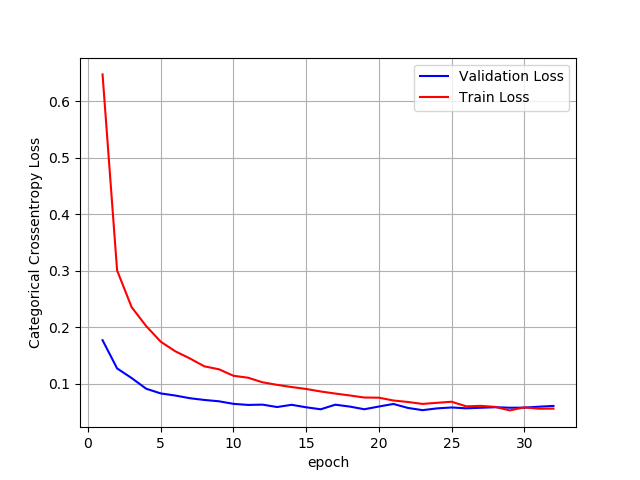

In [47]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,33))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 5 layer network 
#### 784 - 512 - 256 - 128 - 64 - 32 - 10 with all relu and softmax output

In [10]:
# input
inputs = Input(shape=(784,),name='Input_layer')
# hidden layer 1
x = Dense(512,name='Dlayer1')(inputs)
x = Activation('relu',name='Alayer1')(x)
#hidden layer2
x = Dense(256,name='Dlayer2')(x)
x = Activation('relu',name='Alayer2')(x)
#hidden layer3
x = Dense(128,name='Dlayer3')(x)
x = Activation('relu',name='Alayer3')(x)
#hidden layer4
x = Dense(64,name='Dlayer4')(x)
x = Activation('relu',name='Alayer4')(x)
#hidden layer5
x = Dense(32,name='Dlayer5')(x)
x = Activation('relu',name='Alayer5')(x)
#out
out = Dense(10, activation='softmax',name='Output_layer')(x)
#model
model = Model(inputs=inputs, outputs=out)
print(model.summary())
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#compile
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
#training
history = model.fit(X_train, Y_train, batch_size=128, epochs=25, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     (None, 784)               0         
_________________________________________________________________
Dlayer1 (Dense)              (None, 512)               401920    
_________________________________________________________________
Alayer1 (Activation)         (None, 512)               0         
_________________________________________________________________
Dlayer2 (Dense)              (None, 256)               131328    
_________________________________________________________________
Alayer2 (Activation)         (None, 256)               0         
_________________________________________________________________
Dlayer3 (Dense)              (None, 128)               32896     
_________________________________________________________________
Alayer3 (Activation)         (None, 128)               0         
__________

Test score: 0.09583575944229597
Test accuracy: 0.9826


<IPython.core.display.Javascript object>


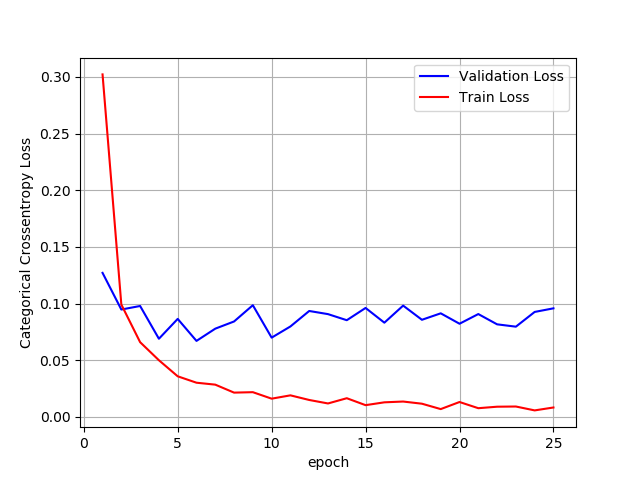

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,26))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

###### With step decay of learning rate

In [23]:
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate = 0.0005
    drop = 0.5
    epochs_drop = 3.0
    lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate
lrate = LearningRateScheduler(step_decay)

In [24]:
# input
inputs = Input(shape=(784,),name='Input_layer')
# hidden layer 1
x = Dense(512,name='Dlayer1')(inputs)
x = Activation('relu',name='Alayer1')(x)
#hidden layer2
x = Dense(256,name='Dlayer2')(x)
x = Activation('relu',name='Alayer2')(x)
#hidden layer3
x = Dense(128,name='Dlayer3')(x)
x = Activation('relu',name='Alayer3')(x)
#hidden layer4
x = Dense(64,name='Dlayer4')(x)
x = Activation('relu',name='Alayer4')(x)
#hidden layer5
x = Dense(32,name='Dlayer5')(x)
x = Activation('relu',name='Alayer5')(x)
#out
out = Dense(10, activation='softmax',name='Output_layer')(x)
#model
model = Model(inputs=inputs, outputs=out)
print(model.summary())
adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#compile
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
#training
history = model.fit(X_train, Y_train, batch_size=128, epochs=25, verbose=1, 
                      validation_data=(X_test, Y_test),callbacks=[lrate])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     (None, 784)               0         
_________________________________________________________________
Dlayer1 (Dense)              (None, 512)               401920    
_________________________________________________________________
Alayer1 (Activation)         (None, 512)               0         
_________________________________________________________________
Dlayer2 (Dense)              (None, 256)               131328    
_________________________________________________________________
Alayer2 (Activation)         (None, 256)               0         
_________________________________________________________________
Dlayer3 (Dense)              (None, 128)               32896     
_________________________________________________________________
Alayer3 (Activation)         (None, 128)               0         
__________

Test score: 0.07307920760185134
Test accuracy: 0.9819


<IPython.core.display.Javascript object>


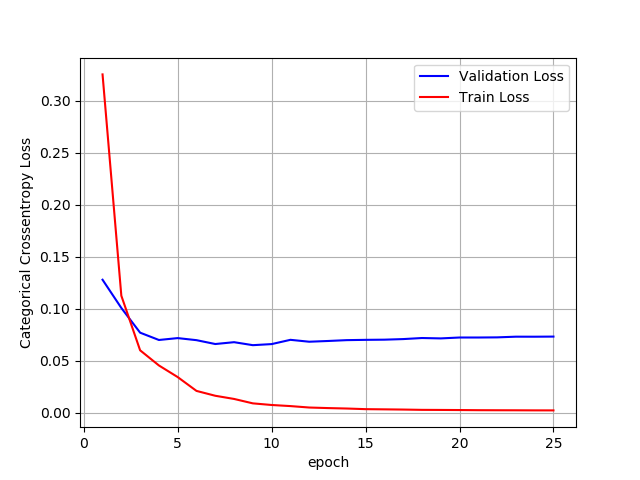

In [25]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,26))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### 784 - 512 - 256 - 128 - 64 - 32 - 10 with all relu,batchnorm on hidden layers and softmax output

In [26]:
# input
inputs = Input(shape=(784,),name='Input_layer')
# hidden layer 1
x = Dense(512,name='Dlayer1')(inputs)
x = BatchNormalization(name='Blayer1')(x)
x = Activation('relu',name='Alayer1')(x)
#hidden layer2
x = Dense(256,name='Dlayer2')(x)
x = BatchNormalization(name='Blayer2')(x)
x = Activation('relu',name='Alayer2')(x)
#hidden layer3
x = Dense(128,name='Dlayer3')(x)
x = BatchNormalization(name='Blayer3')(x)
x = Activation('relu',name='Alayer3')(x)
#hidden layer4
x = Dense(64,name='Dlayer4')(x)
x = BatchNormalization(name='Blayer4')(x)
x = Activation('relu',name='Alayer4')(x)
#hidden layer5
x = Dense(32,name='Dlayer5')(x)
x = BatchNormalization(name='Blayer5')(x)
x = Activation('relu',name='Alayer5')(x)
#out
out = Dense(10, activation='softmax',name='Output_layer')(x)
#model
model = Model(inputs=inputs, outputs=out)
print(model.summary())
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#compile
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
#training
history = model.fit(X_train, Y_train, batch_size=128, epochs=32, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     (None, 784)               0         
_________________________________________________________________
Dlayer1 (Dense)              (None, 512)               401920    
_________________________________________________________________
Blayer1 (BatchNormalization) (None, 512)               2048      
_________________________________________________________________
Alayer1 (Activation)         (None, 512)               0         
_________________________________________________________________
Dlayer2 (Dense)              (None, 256)               131328    
_________________________________________________________________
Blayer2 (BatchNormalization) (None, 256)               1024      
_________________________________________________________________
Alayer2 (Activation)         (None, 256)               0         
__________

Test score: 0.059243739600876144
Test accuracy: 0.9858


<IPython.core.display.Javascript object>


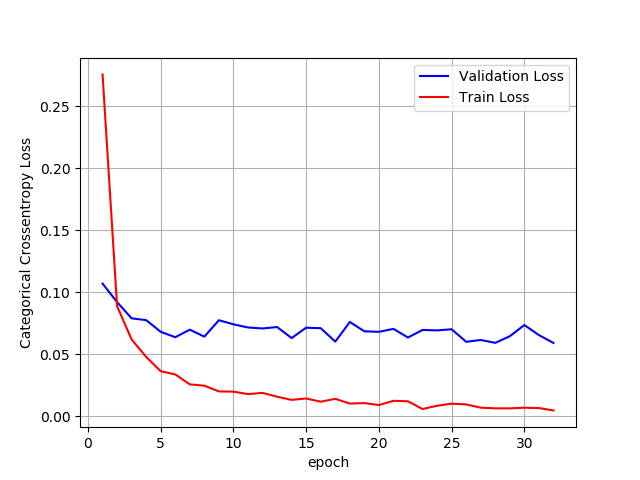

In [28]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,33))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### 784 - 512 - 256 - 128 - 64 - 32 - 10 with all relu,batchnorm and dropout on hidden layers and softmax output

In [31]:
# input
inputs = Input(shape=(784,),name='Input_layer')
# hidden layer 1
x = Dense(512,kernel_initializer='he_normal',name='Dlayer1')(inputs)
x = BatchNormalization(name='Blayer1')(x)
x = Activation('relu',name='Alayer1')(x)
x = Dropout(rate=0.6,name='Drlayer1')(x)
#hidden layer2
x = Dense(256,kernel_initializer='he_normal',name='Dlayer2')(x)
x = BatchNormalization(name='Blayer2')(x)
x = Activation('relu',name='Alayer2')(x)
x = Dropout(rate=0.5,name='Drlayer2')(x)
#hidden layer3
x = Dense(128,kernel_initializer='he_normal',name='Dlayer3')(x)
x = BatchNormalization(name='Blayer3')(x)
x = Activation('relu',name='Alayer3')(x)
x = Dropout(rate=0.5,name='Drlayer3')(x)
#hidden layer4
x = Dense(64,kernel_initializer='he_normal',name='Dlayer4')(x)
x = BatchNormalization(name='Blayer4')(x)
x = Activation('relu',name='Alayer4')(x)
x = Dropout(rate=0.4,name='Drlayer4')(x)
#hidden layer5
x = Dense(32,kernel_initializer='he_normal',name='Dlayer5')(x)
x = BatchNormalization(name='Blayer5')(x)
x = Activation('relu',name='Alayer5')(x)
x = Dropout(rate=0.4,name='Drlayer5')(x)
#out
out = Dense(10,kernel_initializer='he_normal', activation='softmax',name='Output_layer')(x)
#model
model = Model(inputs=inputs, outputs=out)
print(model.summary())
adam = optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#compile
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
#training
history = model.fit(X_train, Y_train, batch_size=128, epochs=32, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     (None, 784)               0         
_________________________________________________________________
Dlayer1 (Dense)              (None, 512)               401920    
_________________________________________________________________
Blayer1 (BatchNormalization) (None, 512)               2048      
_________________________________________________________________
Alayer1 (Activation)         (None, 512)               0         
_________________________________________________________________
Drlayer1 (Dropout)           (None, 512)               0         
_________________________________________________________________
Dlayer2 (Dense)              (None, 256)               131328    
_________________________________________________________________
Blayer2 (BatchNormalization) (None, 256)               1024      
__________

Test score: 0.07434172039366786
Test accuracy: 0.9828


<IPython.core.display.Javascript object>


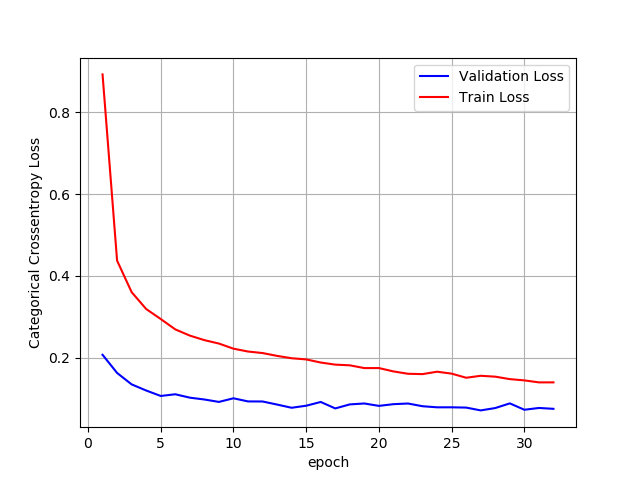

In [32]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,33))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)